## **Universidad Galileo**
## **Maestría en Data Science**
## **Statistical Learning II**
## **Antonio Everardo Navas Contreras, 14003163**
## **24/09/2021**

---

## **PROYECTO FINAL - CNN**

---

### CARGAR LIBRERÍAS

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os
import sklearn as sk
from sklearn import metrics
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.callbacks import ModelCheckpoint
from keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### IMPLEMENTACIÓN 5

#### CARGAR IMAGENES Y CREAR DATASETS

In [11]:
# URL de datos

#train_dir = '/content/drive/MyDrive/CONVNET/train/subset'
#test_dir = '/content/drive/MyDrive/CONVNET/test/subset'

#train_dir = '/content/drive/MyDrive/CONVNET/mano/subset'
#test_dir = '/content/drive/MyDrive/CONVNET/train/subset'

train_dir = '/content/drive/MyDrive/CNN/ASL/train'
test_dir = '/content/drive/MyDrive/CNN/ASL/test'

In [12]:
# Parametros iniciales

batch_size = 32
img_size = 200
input_shape = (img_size, img_size, 3)
val_split = 0.2

In [13]:
# Crear dataset de TRAIN

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=1991,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 1500 files belonging to 5 classes.
Using 1200 files for training.


In [14]:
# Crear dataset de VALIDATION

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=1991,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 1500 files belonging to 5 classes.
Using 300 files for validation.


In [15]:
# Crear dataset de TEST

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=1991,
  image_size=(img_size, img_size),
  batch_size=batch_size)

Found 25 files belonging to 5 classes.


In [16]:
# Clases a utilizar

class_names = train_ds.class_names
num_classes = len(class_names)
print(class_names)
print(num_classes)

['A', 'B', 'C', 'D', 'E']
5


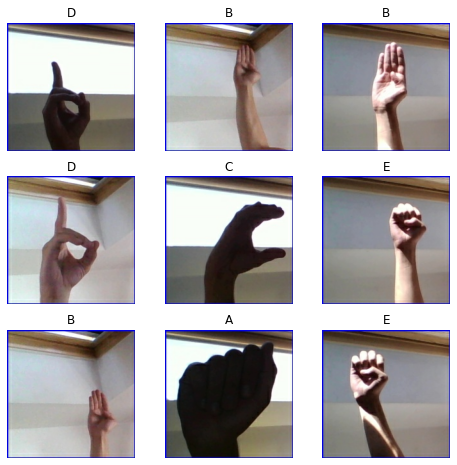

In [ ]:
# Graficar algunas imágenes del TRAIN SET

dataset = train_ds
n = 9

plt.figure(figsize=(8, 8))
for images, labels in dataset.take(1):
  for i in range(n):
    ax = plt.subplot(-(-n//3), 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

#### CREAR LA RED CNN

In [17]:
# Generar data para entrenamiento del modelo

data_augmentation = Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=input_shape),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.3),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3)
  ]
)

In [18]:
# Chekpoint para guardar los parámetros del mejor Accuracy alcanzado con datos de validación

checkpoint = ModelCheckpoint(filepath="/content/drive/MyDrive/CNN/Models/CONVNET_best_weights5.hdf5",
                             monitor = 'val_accuracy',
                             verbose=1, 
                             save_best_only=True,)

In [19]:
# Red Convolucional

activation = 'relu'

try:
  model.load_weights('/content/drive/MyDrive/CNN/Models/CONVNET_best_weights5.hdf5')
except:
  model = Sequential([
                      data_augmentation,
                      tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
                      Conv2D(32, 3, padding='same', activation=activation),
                      MaxPool2D(),
                      Conv2D(32, 3, padding='same', activation=activation),
                      MaxPool2D(),
                      Dropout(0.4),
                      Conv2D(64, 3, padding='same', activation=activation),
                      MaxPool2D(),
                      Dropout(0.4),
                      Flatten(),
                      Dense(128, activation=activation),
                      Dense(num_classes)
  ])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 32)       

In [21]:
# Compilar y entrenar del modelo CNN

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Compilar y entrenar del modelo CNN

epochs = 200

history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs,
    callbacks = [checkpoint]
)

Epoch 1/200
38/38 [==============================] - 57s 1s/step - loss: 1.7912 - accuracy: 0.2083 - val_loss: 1.6107 - val_accuracy: 0.1900

Epoch 00001: val_accuracy improved from -inf to 0.19000, saving model to /content/drive/MyDrive/CONVNET/Models/CONVNET_best_weights5.hdf5
Epoch 2/200
38/38 [==============================] - 56s 1s/step - loss: 1.6096 - accuracy: 0.2067 - val_loss: 1.6108 - val_accuracy: 0.1833

Epoch 00002: val_accuracy did not improve from 0.19000
Epoch 3/200
38/38 [==============================] - 56s 1s/step - loss: 1.6093 - accuracy: 0.2083 - val_loss: 1.6120 - val_accuracy: 0.1633

Epoch 00003: val_accuracy did not improve from 0.19000
Epoch 4/200
38/38 [==============================] - 56s 1s/step - loss: 1.6096 - accuracy: 0.2100 - val_loss: 1.6111 - val_accuracy: 0.1533

Epoch 00004: val_accuracy did not improve from 0.19000
Epoch 5/200
38/38 [==============================] - 56s 1s/step - loss: 1.6093 - accuracy: 0.1983 - val_loss: 1.6115 - val_accur

In [ ]:
# Guardar el modelo final

model.save('/content/drive/MyDrive/CONVNET/Models/CONVNET_Final_Sign_Language5.h5')

#### EXPERIMENTO 1

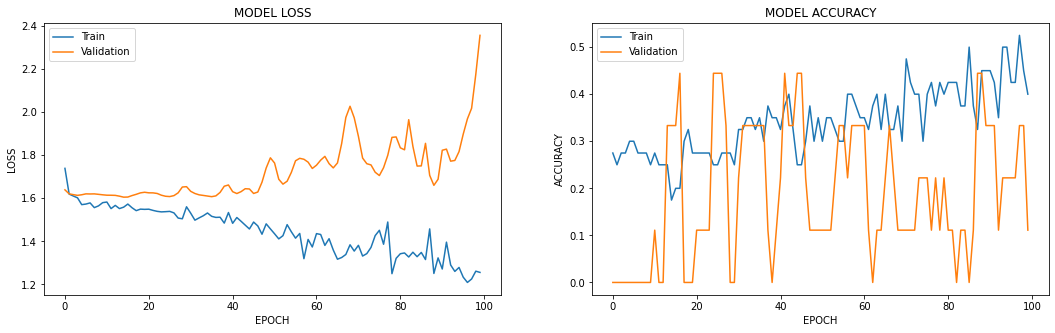

In [ ]:
# Dataset inicial pequeño

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset inicial pequeño

loss, acc = model.evaluate(test_ds)
print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 505ms/step - loss: 7.8413 - accuracy: 0.1333
Test Loss:      7.84
Test Accuracy:  13.33 %


#### EXPERIMENTO 2

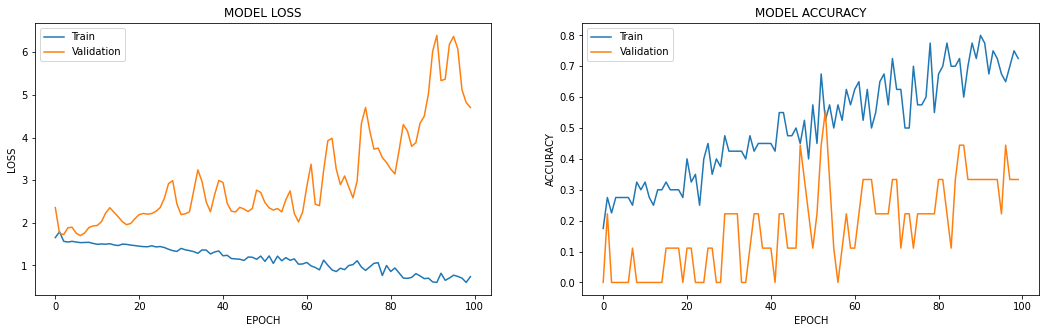

In [ ]:
# Dataset inicial pequeño

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset inicial pequeño

loss, acc = model.evaluate(test_ds)
print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 703ms/step - loss: 2.0550 - accuracy: 0.0667
Test Loss:      2.06
Test Accuracy:  6.67 %


#### EXPERIMENTO 3

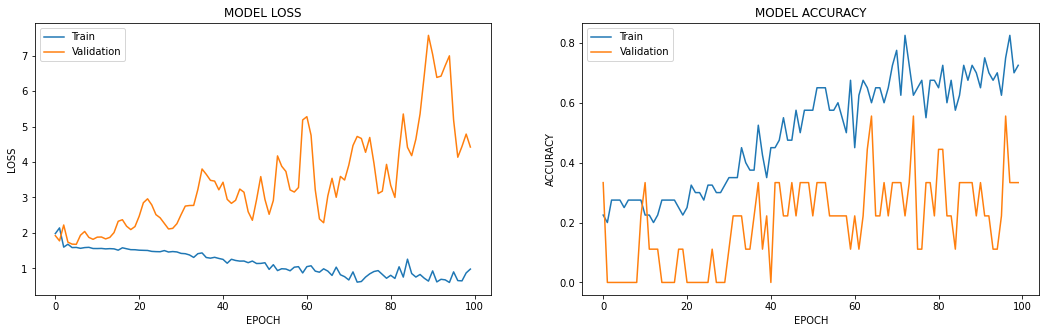

In [ ]:
# Dataset inicial pequeño

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset inicial pequeño

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 571ms/step - loss: 2.4350 - accuracy: 0.3333
Test Accuracy:  33.33 %


#### EXPERIMENTO 4

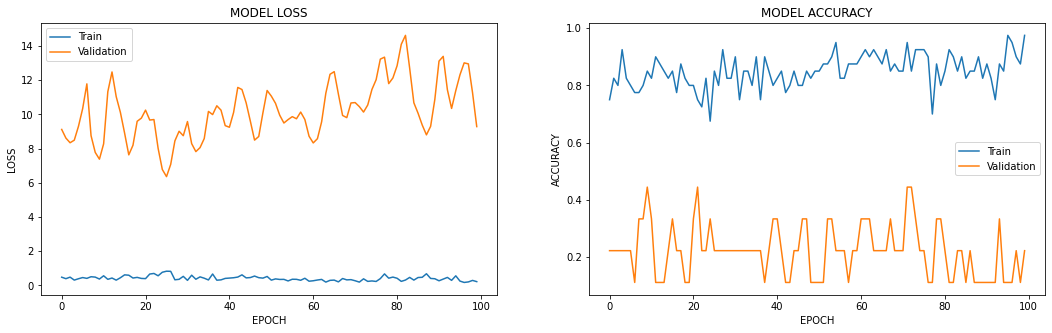

In [ ]:
# Dataset inicial pequeño

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset inicial pequeño

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 1s/step - loss: 2.0644 - accuracy: 0.2667
Test Accuracy:  26.67 %


#### EXPERIMENTO 5

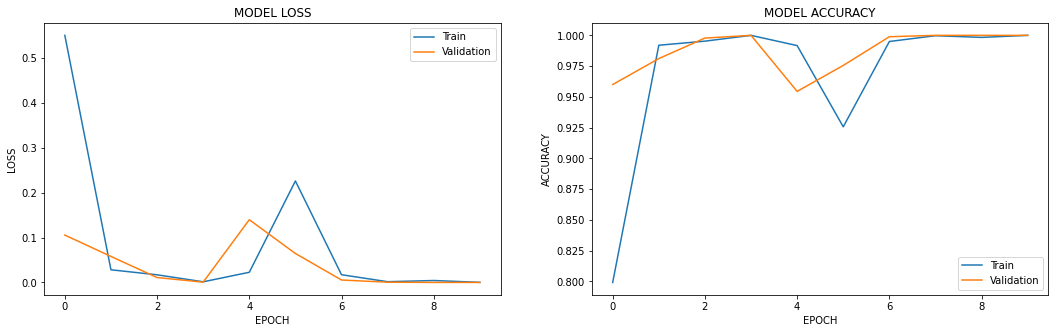

In [ ]:
# Dataset mano, 901 imagenes * 5 letras

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset mano, 901 imagenes * 5 letras

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 534ms/step - loss: 7.4838 - accuracy: 0.0667
Test Accuracy:  6.67 %


#### EXPERIMENTO 6

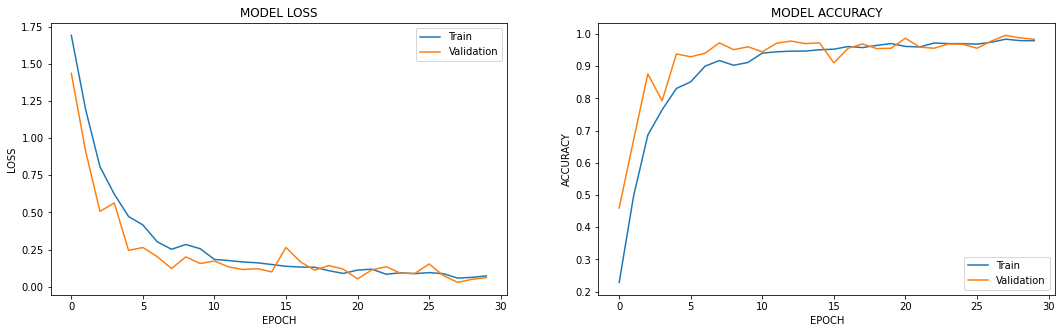

In [ ]:
# Dataset mano, 901 imagenes * 5 letras

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset mano, 901 imagenes * 5 letras

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

2/2 [==============================] - 2s 245ms/step - loss: 10.4673 - accuracy: 0.2857
Test Accuracy:  28.57 %


#### EXPERIMENTO 7

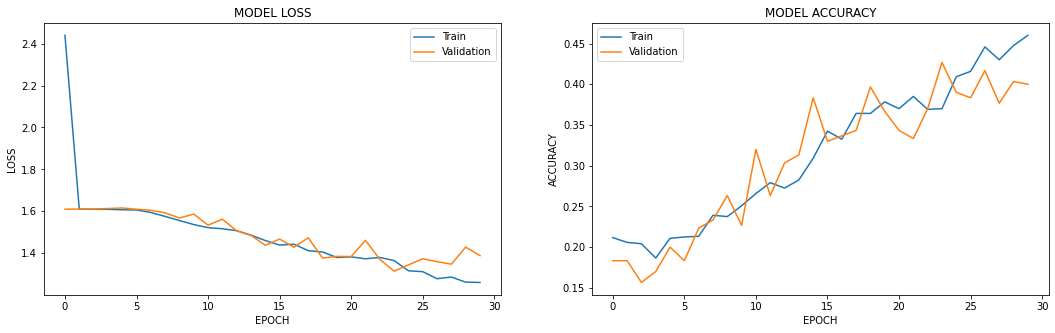

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 597ms/step - loss: 1.0903 - accuracy: 0.8000
Test Accuracy:  80.0 %


#### EXPERIMENTO 8

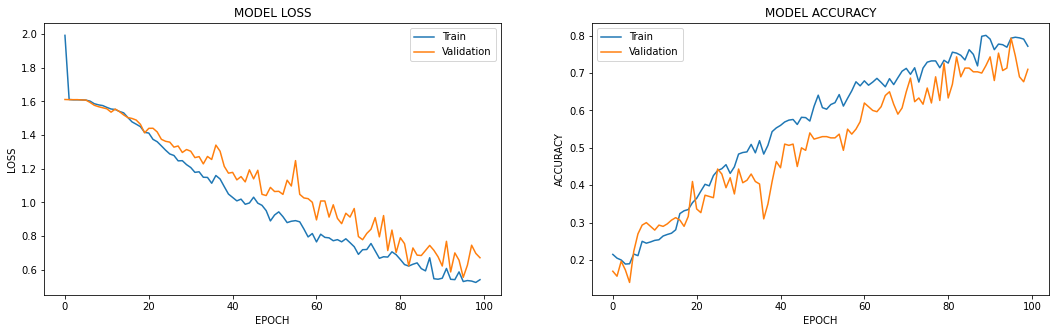

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras

model.load_weights('/content/drive/MyDrive/CNN/Models/CONVNET_best_weights3.hdf5')

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 1s 606ms/step - loss: 0.5707 - accuracy: 0.8000
Test Accuracy:  80.0 %


#### EXPERIMENTO 9

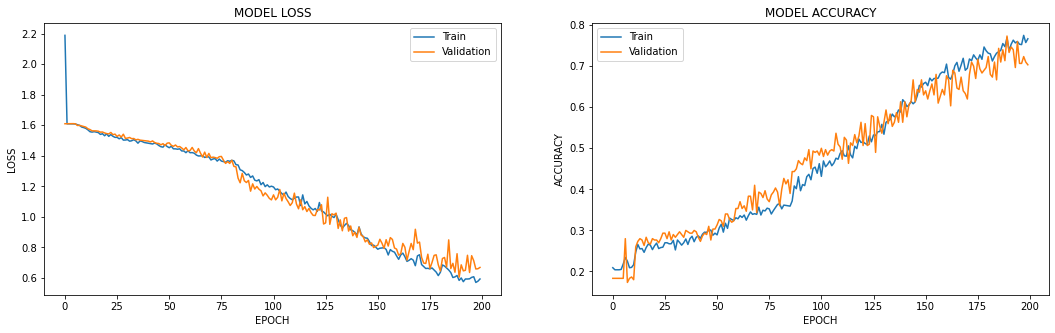

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras, batch_size 64

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras, batch_size 64

model.load_weights('/content/drive/MyDrive/CNN/Models/CONVNET_best_weights4.hdf5')

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 7s 7s/step - loss: 0.4824 - accuracy: 0.8000
Test Accuracy:  80.0 %


#### EXPERIMENTO 10

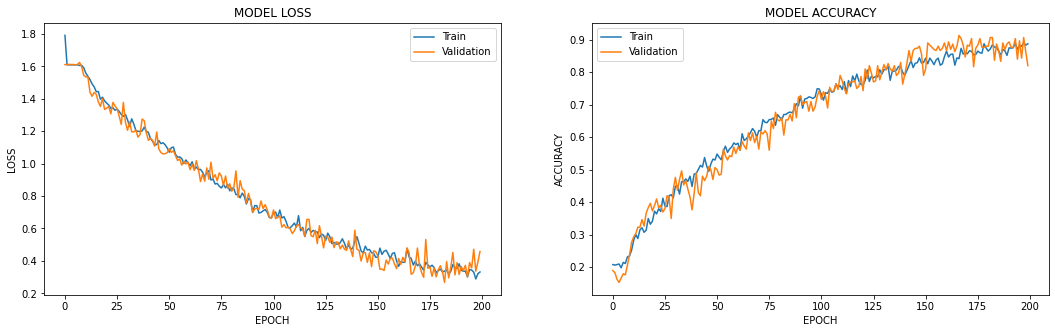

In [ ]:
# Dataset ASL, 300 imagenes * 5 letras, batch_size 32

plt.figure(figsize=(18, 5))

# Gráfica de LOSS
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('MODEL LOSS')
plt.ylabel('LOSS')
plt.xlabel('EPOCH')
plt.legend()

# Gráfica de ACCURACY
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('MODEL ACCURACY')
plt.ylabel('ACCURACY')
plt.xlabel('EPOCH')
plt.legend()
plt.show()

In [23]:
# Dataset ASL, 300 imagenes * 5 letras, batch_size 32

model.load_weights('/content/drive/MyDrive/CNN/Models/CONVNET_best_weights5.hdf5')

loss, acc = model.evaluate(test_ds)
#print("Test Loss:     ", np.round(loss, 2))
print("Test Accuracy: ", np.round(acc*100, 2), '%')

1/1 [==============================] - 2s 2s/step - loss: 0.3599 - accuracy: 0.8800
Test Accuracy:  88.0 %


#### Graficar imagenes con label de predicción

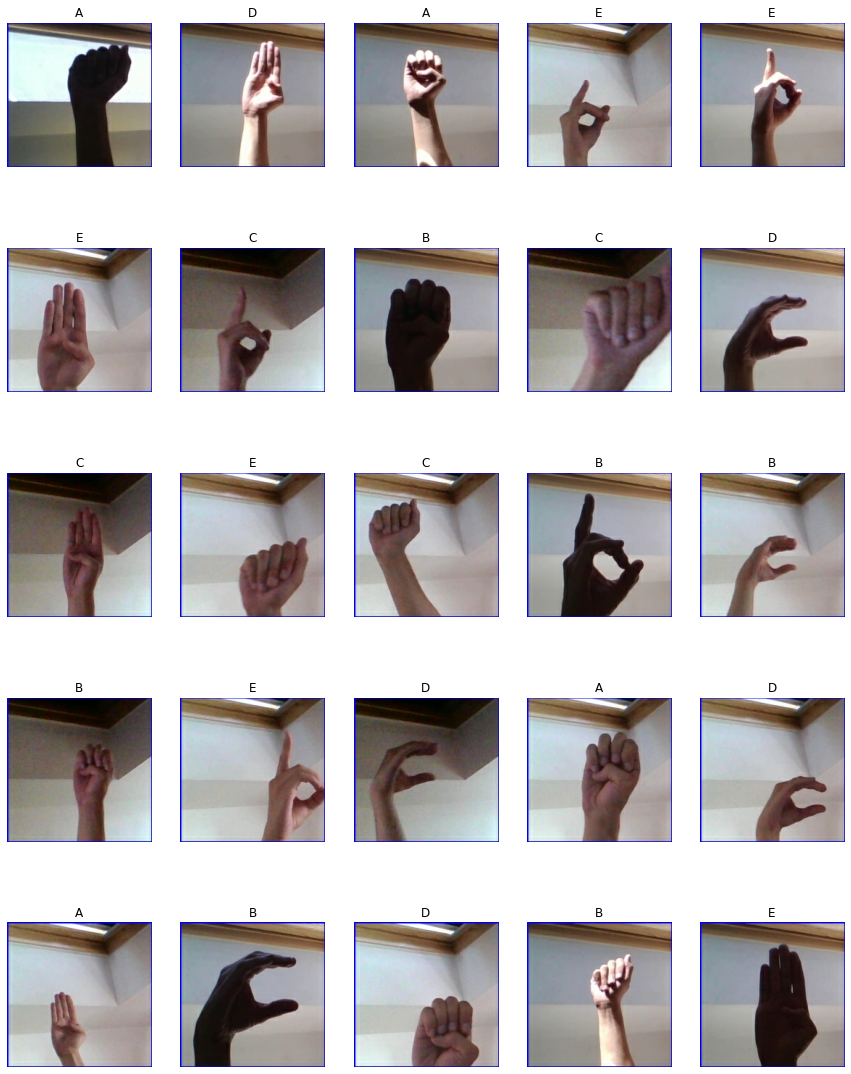

In [24]:
labels_pred = np.argmax(model.predict(test_ds), axis=1)
#print(labels_pred)

dataset = test_ds
n = 25

plt.figure(figsize=(15, 20))
for images, labels in dataset.take(-1):
  for i in range(n):
    ax = plt.subplot(-(-n//5), 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels_pred[i]])
    plt.axis("off")

#### Graficar capas intermedias

In [27]:
# Extraer los outputs de las capas activación
layer_outputs = [layer.output for layer in model.layers[1:10]]

# Crear un modelo con las capas de activación
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Realizar las predicciones con las capas de activación
activations = activation_model.predict(test_ds)

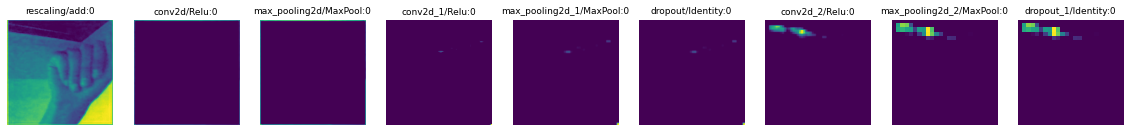

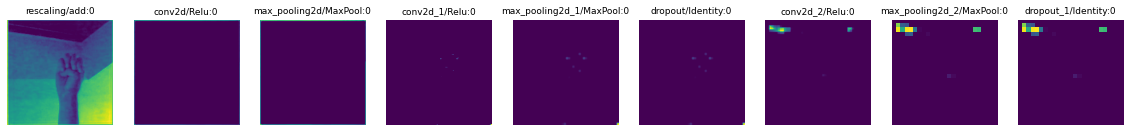

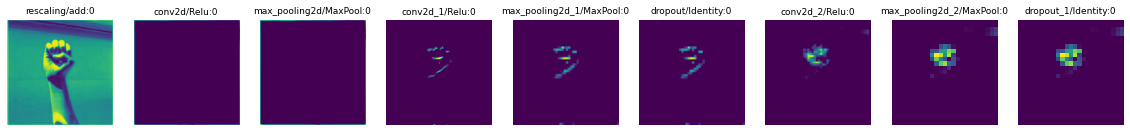

In [28]:
num_images = 3

for i in range(num_images):
  plt.figure(figsize=(20, 20))
  for j, activation in enumerate(activations):
    plt.subplot(i+1, 9, j+1)
    plt.imshow(activation[i, :, :, 2])#, cmap='binary')
    plt.title(layer_outputs[j].name, fontdict={"fontsize":9, "color":"black"})
    plt.axis("off")
  plt.show()

#### CONCLUSIONES

* Podemos observar que la función de costo continúa disminuyendo y la gráfica de exactitud sigue aumentando, este experimento de realizó para 200 épocas y un batch size de 32, derivado de limitaciones de cómputo ya que procesar las imágenes es bastante pesado por lo que conlleva mucho tiempo, para efectos de la prueba se utilizaron 200 épocas y un batch size de 32 con lo que se logró llegar a una exactitud de 88.75% con los datos de entrenamiento, 82% con los datos de validación y 88% con los datos de Test.

* Se pudo experimentar con distintos datasets, los cuales tenías distinta cantidad de imágenes, primero se experimentó con uno que contenía 11 imágenes por cada letra, a pesar de utilizar técnicas para realizar variaciones de dichas imágenes y aumentar el dataset, no fue posible conseguir Accuracy mayor al 30%.

* En el segundo dataset utilizado se tienen 300 imágenes de cada letra, se utilizan técnicas para variación de las imágenes y aumentar el dataset, inicialmente se utilizan pocas epochs y batch size de 64, para validar que corra bien, ya que es pesado entrenar los modelos con imágenes.

